In [29]:
# Reading the data
import pandas as pd

df = pd.read_csv("/content/healthcare-dataset-stroke-data.csv")

In [30]:
# showing the first 5 rows
df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [31]:
# using info() to know the data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [32]:
# using describe() to have an overview of the numerical columns
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [33]:
# to make sure that there are no duplicated rows
df.duplicated().sum()

0

In [34]:
#checking the missing values
df.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


In [35]:
'''
some notes about our results
1) there are 5110 rows in our data
2) 12 column including the "id" column
3) 5 columns have "object" as a data type
4) 7 columns have "int64" or "float64" as a data type (some of them are categorecal such as "hypertension")
5) there are no duplicated rows
6) there are 201 null values in the "bmi" column
'''

'\nsome notes about our results\n1) there are 5110 rows in our data\n2) 12 column including the "id" column\n3) 5 columns have "object" as a data type\n4) 7 columns have "int64" or "float64" as a data type (some of them are categorecal such as "hypertension")\n5) there are no duplicated rows\n6) there are 201 null values in the "bmi" column\n'

In [36]:
df["id"].duplicated().sum()

0

In [37]:
# lets draw histograms with KDE for the numerical columns to know how they are distributed
# split categorical and numarical
# but before splitting them, I will drop the "id" column, because all the values are unique so it hasn't any value to us. Especially when building the model
df.drop(columns = ["id"], inplace = True)

In [38]:
df_numerical_features = df.select_dtypes(include='number')
df_numerical_features.columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke'],
      dtype='object')

In [39]:
df_categorical_features = df.select_dtypes(include='object')
df_categorical_features.columns

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

In [40]:
# since 'hypertension', 'heart_disease', 'stroke' are actually categorical columns, I will move them to the list that contains the categorical columns
# let's drop them first
df_numerical_features.drop(columns = ['hypertension'], inplace = True)
df_numerical_features.drop(columns = ['heart_disease'], inplace = True)
df_numerical_features.drop(columns = ['stroke'], inplace = True)

In [41]:
# let's show the new data frame
df_numerical_features.head()

,age,avg_glucose_level,bmi
0,67.0,228.69,36.6
1,61.0,202.21,NaN
2,80.0,105.92,32.5
3,49.0,171.23,34.4
4,79.0,174.12,24.0


In [42]:
# add them to the dataframe that contains the categorical columns
df_categorical_features['hypertension'] = df['hypertension']
df_categorical_features['heart_disease'] = df['heart_disease']
df_categorical_features['stroke'] = df['stroke']

In [43]:
# showing the new dataframe
df_categorical_features.head()

,gender,ever_married,work_type,Residence_type,smoking_status,hypertension,heart_disease,stroke
0,Male,Yes,Private,Urban,formerly smoked,0,1,1
1,Female,Yes,Self-employed,Rural,never smoked,0,0,1
2,Male,Yes,Private,Rural,never smoked,0,1,1
3,Female,Yes,Private,Urban,smokes,0,0,1
4,Female,Yes,Self-employed,Rural,never smoked,1,0,1


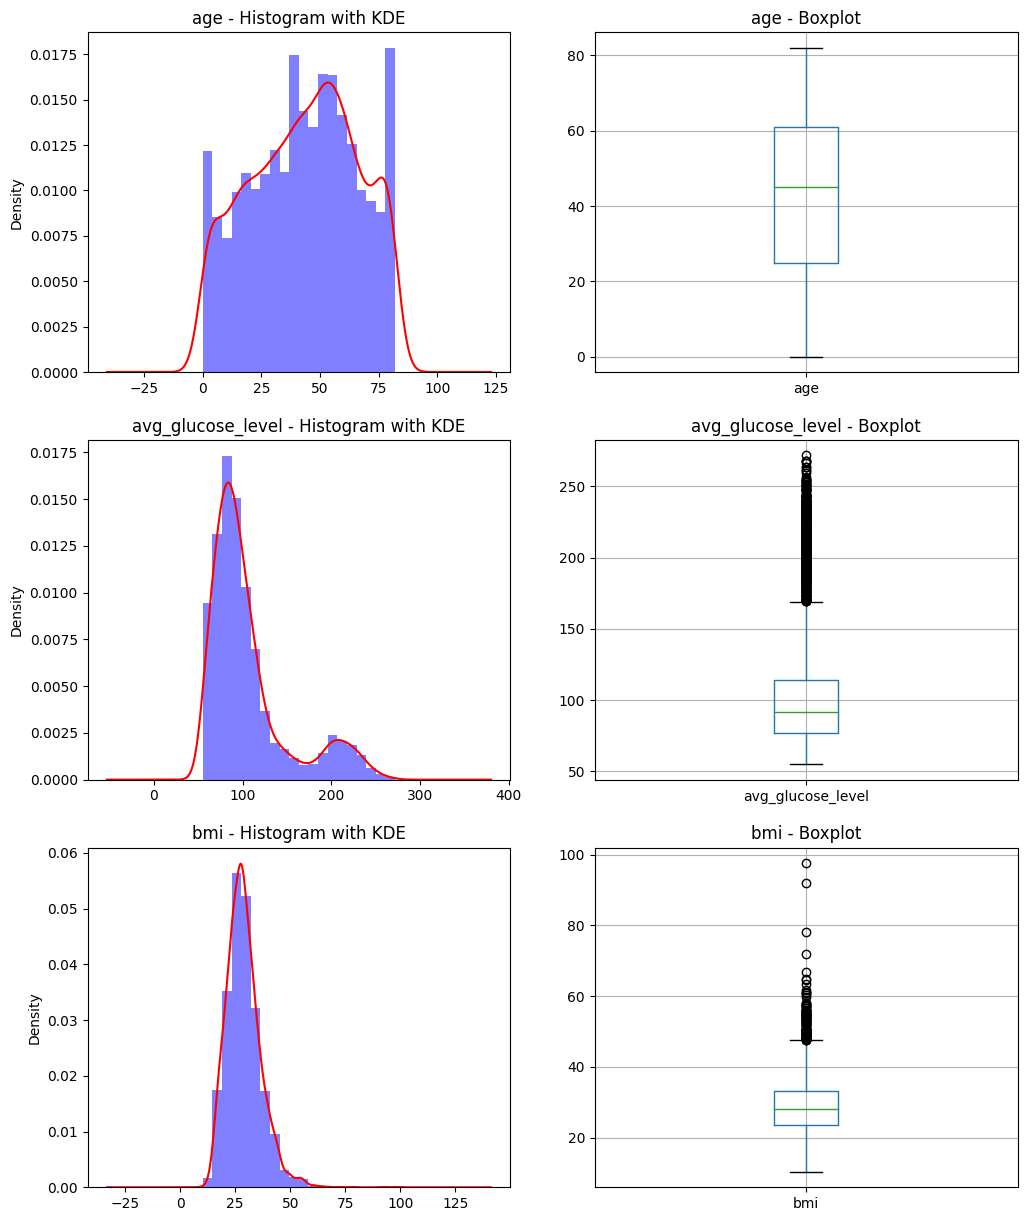

In [44]:
# now, the data is ready to be used to draw the histograms
import numpy as np
import matplotlib.pyplot as plt

# Sample data creation
np.random.seed(0)

# Plotting Histogram with KDE and Boxplot for each numerical feature
fig, axes = plt.subplots(len(df_numerical_features.columns), 2, figsize=(12, 5 * len(df_numerical_features.columns)))

for i, col in enumerate(df_numerical_features.columns):
    # Histogram with KDE
    df_numerical_features[col].plot(kind='hist', density=True, ax=axes[i, 0], bins=20, alpha=0.5, color='blue')
    df_numerical_features[col].plot(kind='kde', ax=axes[i, 0], color='red')
    axes[i, 0].set_title(f'{col} - Histogram with KDE')

    # We can add Boxplot to be more clear
    # Boxplot
    df_numerical_features.boxplot(column=col, ax=axes[i, 1])
    axes[i, 1].set_title(f'{col} - Boxplot')

plt.show()

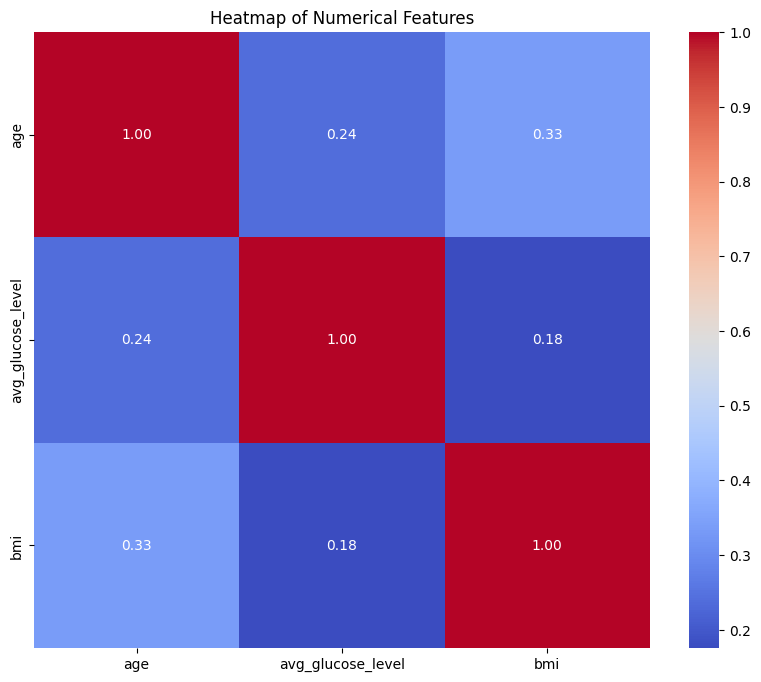

In [45]:
# draw a heatmap to know if there is correltaion between the columns
import seaborn as sns
corr = df_numerical_features.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Heatmap of Numerical Features')
plt.show()

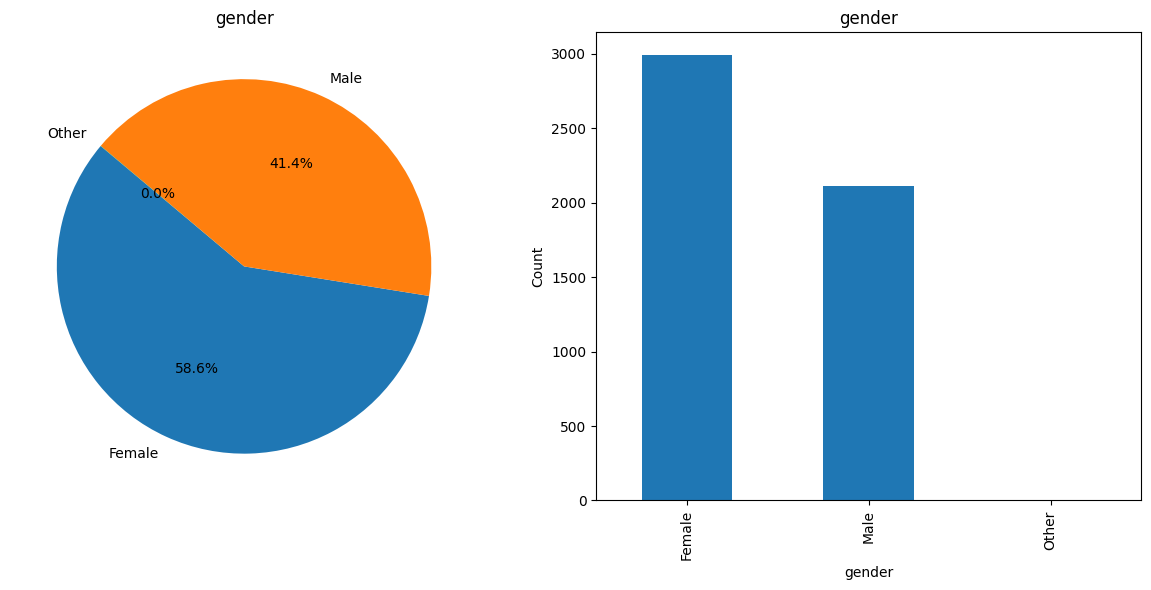

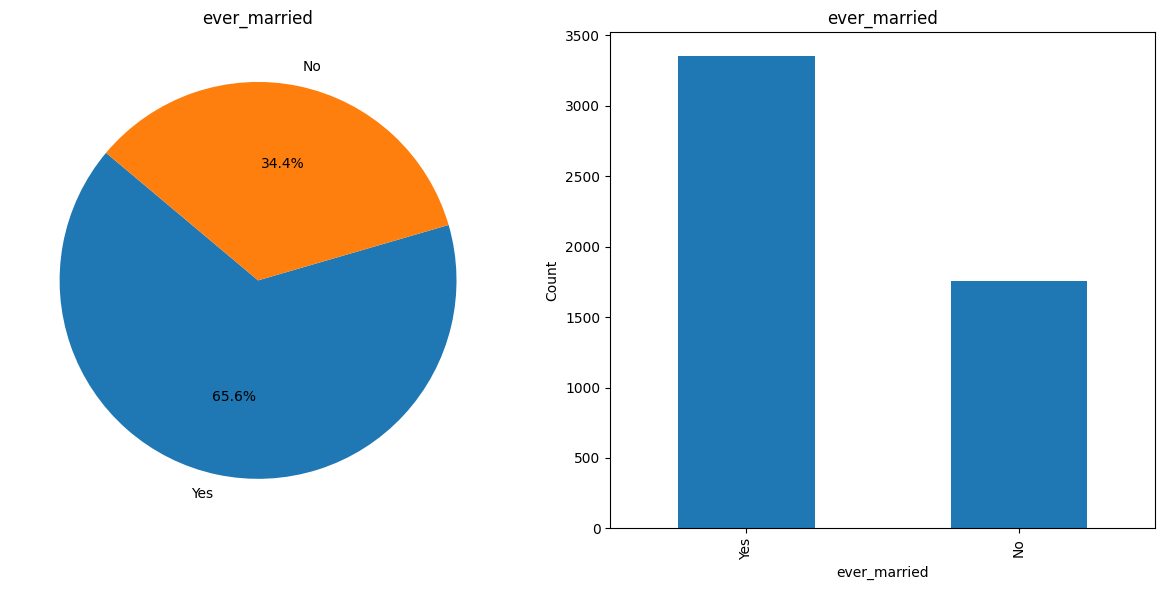

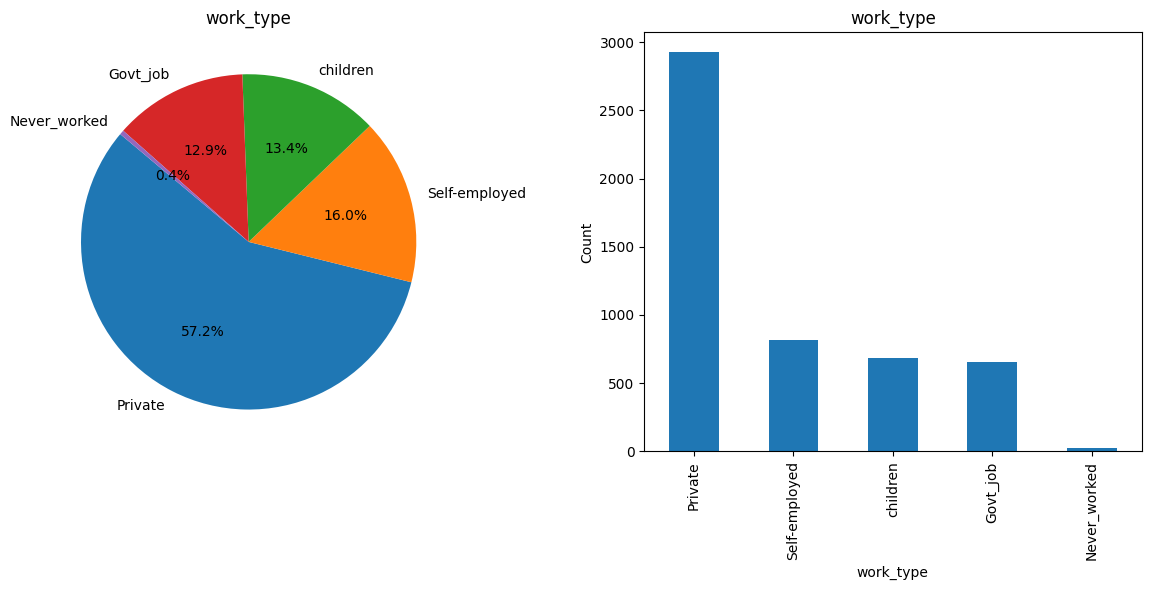

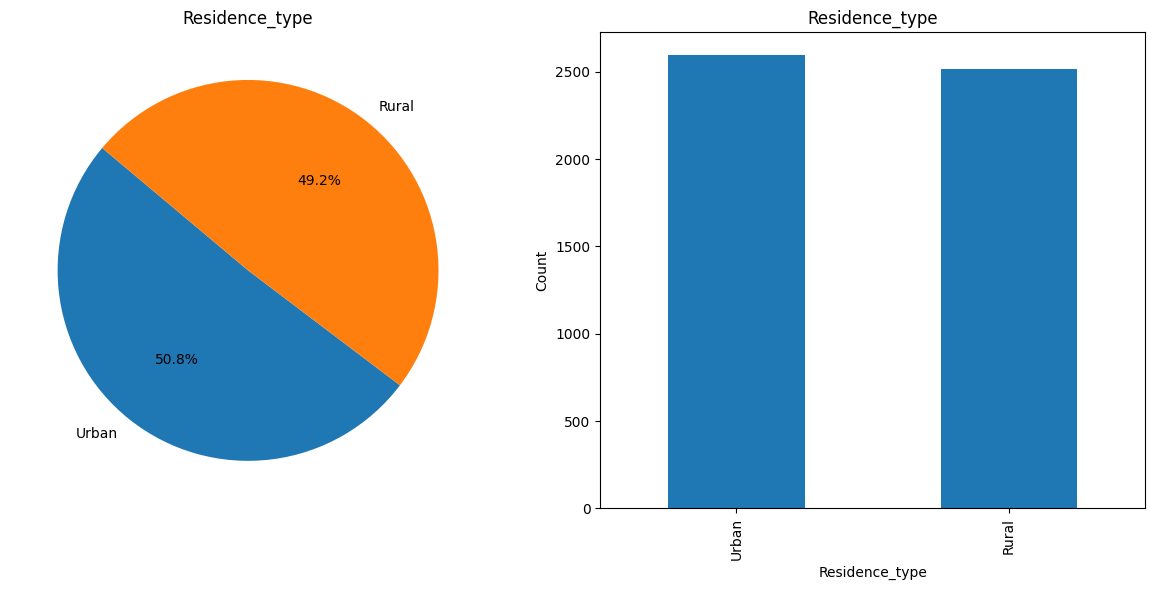

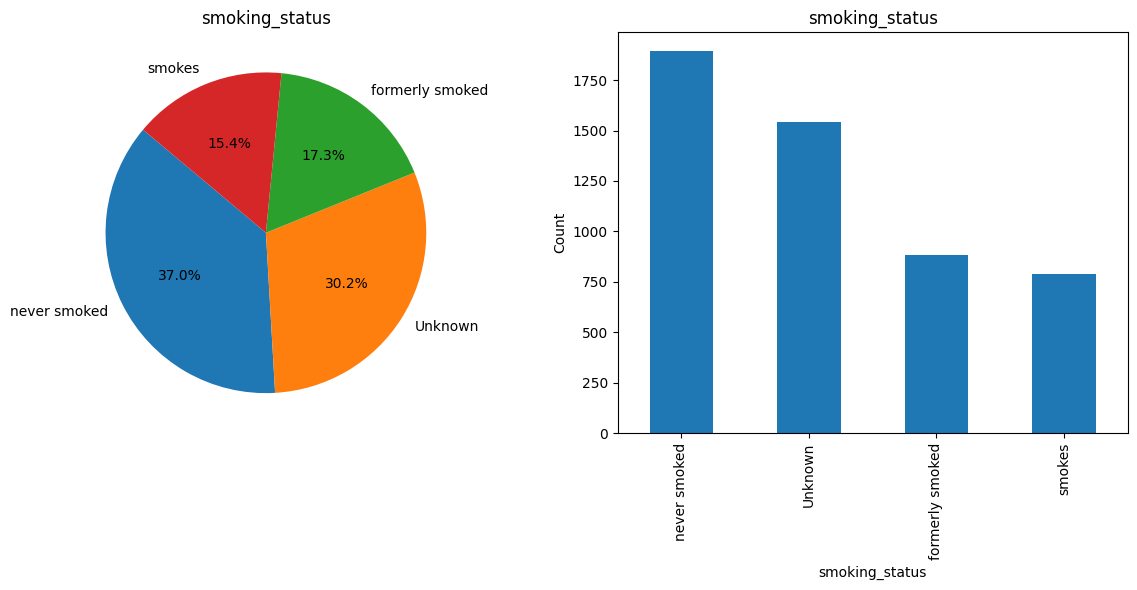

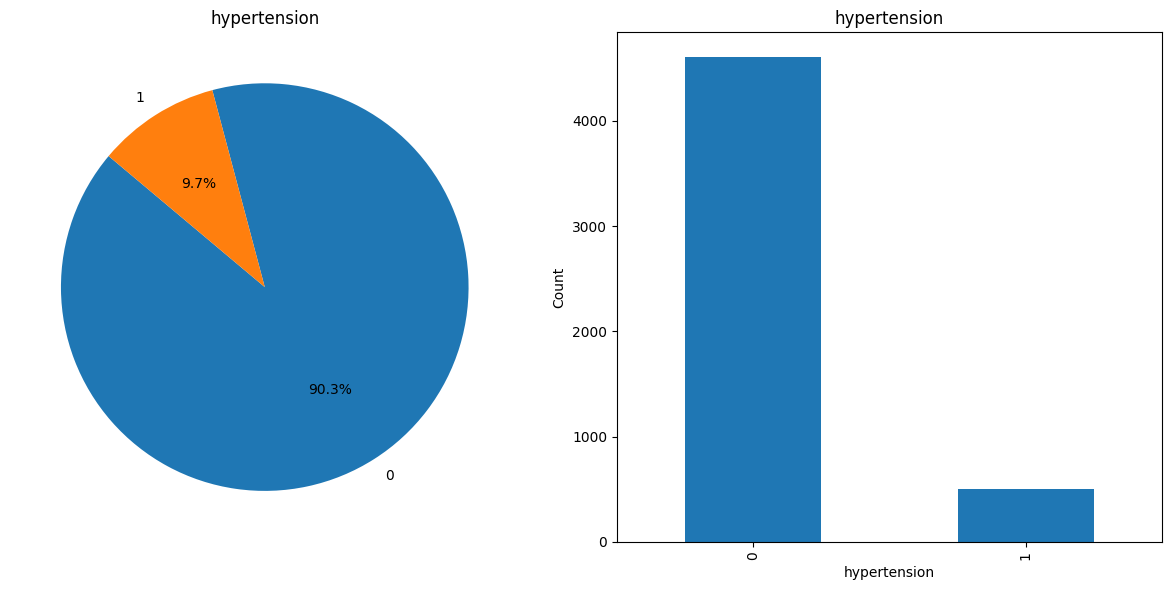

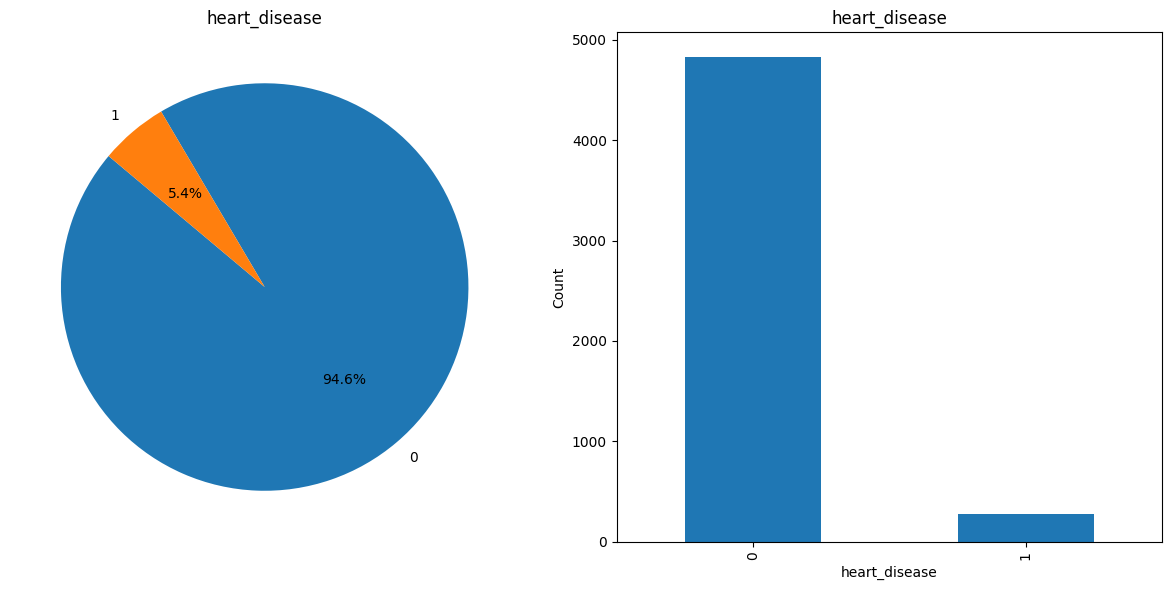

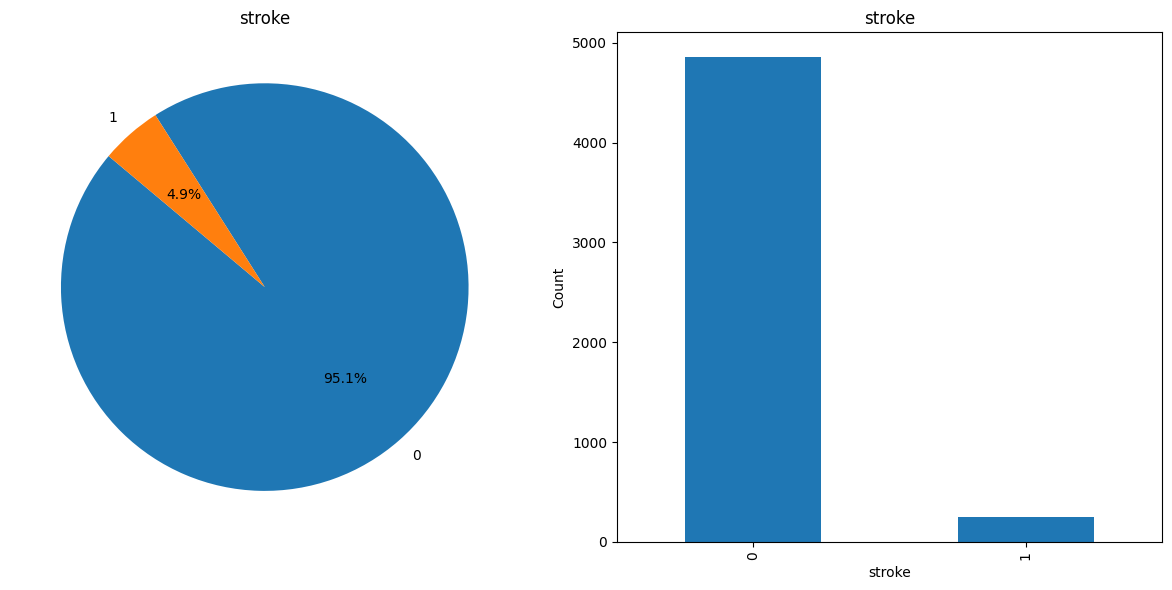

In [46]:
# draw Pie chart, Bar chart to know if the data is biased or not
for i in df_categorical_features.columns:
  counts = df_categorical_features[i].value_counts()

  # Plotting
  fig, axes = plt.subplots(1, 2, figsize=(12, 6))

  # Pie chart
  axes[0].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
  axes[0].set_title(i)

  # Bar chart
  counts.plot(kind='bar', ax=axes[1])
  axes[1].set_title(i)
  axes[1].set_ylabel('Count')
  axes[1].set_xlabel(i)

  plt.tight_layout()
  plt.show()

In [47]:
# as the figues proposed, the data is unbalanced. since most of the approaches that we use to solve this problem usually needs an expert in the domain, i will leave it as it is
df_encoded = pd.get_dummies(df, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'hypertension', 'heart_disease'])

In [48]:
# note: the columns that contains True/False are "bool" not "object", so it's acceptable by the model
df_encoded.head()

,age,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,...,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,hypertension_0,hypertension_1,heart_disease_0,heart_disease_1
0,67.0,228.69,36.6,1,False,True,False,False,True,False,...,False,True,False,True,False,False,True,False,False,True
1,61.0,202.21,NaN,1,True,False,False,False,True,False,...,True,False,False,False,True,False,True,False,True,False
2,80.0,105.92,32.5,1,False,True,False,False,True,False,...,True,False,False,False,True,False,True,False,False,True
3,49.0,171.23,34.4,1,True,False,False,False,True,False,...,False,True,False,False,False,True,True,False,True,False
4,79.0,174.12,24.0,1,True,False,False,False,True,False,...,True,False,False,False,True,False,False,True,True,False


In [49]:
# split the target column
X = df_encoded.drop(columns=['stroke'],axis=1)
y = df_encoded['stroke']

In [50]:
# scale the numerical values
# since the every has an outliers standardization (StandardScaler) is more preferable over normalization (MinMaxScalar)
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the data and transform it
scaled_data = scaler.fit_transform(X)

# Creating a new DataFrame for the scaled data
scaled_df = pd.DataFrame(scaled_data, columns=X.columns)

scaled_df.head()

,age,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,...,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,hypertension_0,hypertension_1,heart_disease_0,heart_disease_1
0,1.051434,2.706375,0.981345,-1.189510,1.189990,-0.01399,-0.723884,0.723884,-0.384111,-0.065756,...,-0.984080,0.984080,-0.658011,2.184951,-0.766774,-0.427313,0.328602,-0.328602,-4.185032,4.185032
1,0.786070,2.121559,NaN,0.840682,-0.840343,-0.01399,-0.723884,0.723884,-0.384111,-0.065756,...,1.016178,-1.016178,-0.658011,-0.457676,1.304165,-0.427313,0.328602,-0.328602,0.238947,-0.238947
2,1.626390,-0.005028,0.459269,-1.189510,1.189990,-0.01399,-0.723884,0.723884,-0.384111,-0.065756,...,1.016178,-1.016178,-0.658011,-0.457676,1.304165,-0.427313,0.328602,-0.328602,-4.185032,4.185032
3,0.255342,1.437358,0.701207,0.840682,-0.840343,-0.01399,-0.723884,0.723884,-0.384111,-0.065756,...,-0.984080,0.984080,-0.658011,-0.457676,-0.766774,2.340204,0.328602,-0.328602,0.238947,-0.238947
4,1.582163,1.501184,-0.623083,0.840682,-0.840343,-0.01399,-0.723884,0.723884,-0.384111,-0.065756,...,1.016178,-1.016178,-0.658011,-0.457676,1.304165,-0.427313,-3.043196,3.043196,0.238947,-0.238947


In [51]:
'''
split the data
fill missing values
build the models
fine-tune the models
test each model
show the accuracy
'''

'\nsplit the data\nfill missing values\nbuild the models\nfine-tune the models\ntest each model\nshow the accuracy\n'

In [52]:
# I will build the most popular classification models, then compare them
# import the required libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report # these are the metrics that used to measure the effeciency of the models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV # it is used to fine-tune the models (finding the best combination of hyperparameters values)

In [53]:
# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [54]:
# Fill the missing values in "bmi" after splitting to avoid data leakage
X_train["bmi"].fillna(float(X_train["bmi"].median()), inplace = True)
X_test["bmi"].fillna(float(X_test["bmi"].median()), inplace = True)

In [55]:
# Logistic Regression
# Define the model
logreg = LogisticRegression()

# Define the hyperparameters to tune
param_grid_logreg = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 200, 300]
}

# Initialize GridSearchCV
grid_logreg = GridSearchCV(logreg, param_grid_logreg, cv=5, scoring='accuracy')

# Fit the model
grid_logreg.fit(X_train, y_train)

# Best parameters and accuracy
print("Best Parameters for Logistic Regression:", grid_logreg.best_params_)
print("Best Accuracy for Logistic Regression:", grid_logreg.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Best Parameters for Logistic Regression: {'C': 0.01, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
Best Accuracy for Logistic Regression: 0.9552697581747861


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
675 fits failed out of a total of 1500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)


In [56]:
# Decision Tree Classifier
# Define the model
dtree = DecisionTreeClassifier()

# Define the hyperparameters to tune
param_grid_dtree = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'auto', 'sqrt', 'log2']
}

# Initialize GridSearchCV
grid_dtree = GridSearchCV(dtree, param_grid_dtree, cv=5, scoring='accuracy')

# Fit the model
grid_dtree.fit(X_train, y_train)

# Best parameters and accuracy
print("Best Parameters for Decision Tree:", grid_dtree.best_params_)
print("Best Accuracy for Decision Tree:", grid_dtree.best_score_)

Best Parameters for Decision Tree: {'criterion': 'gini', 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 10, 'splitter': 'random'}
Best Accuracy for Decision Tree: 0.9552697581747861


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
1080 fits failed out of a total of 4320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1080 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/u

In [57]:
# K-Nearest Neighbors (KNN) Classifier
# Define the model
knn = KNeighborsClassifier()

# Define the hyperparameters to tune
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]  # p=1: Manhattan distance, p=2: Euclidean distance
}

# Initialize GridSearchCV
grid_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='accuracy')

# Fit the model
grid_knn.fit(X_train, y_train)

# Best parameters and accuracy
print("Best Parameters for KNN:", grid_knn.best_params_)
print("Best Accuracy for KNN:", grid_knn.best_score_)

Best Parameters for KNN: {'algorithm': 'auto', 'n_neighbors': 11, 'p': 2, 'weights': 'uniform'}
Best Accuracy for KNN: 0.9544313786771887


In [58]:
# Naïve Bayes Classifier (GaussianNB)
# Define the model
nb = GaussianNB()

# Define the hyperparameters to tune
param_grid_nb = {
    'var_smoothing': np.logspace(0, -9, num=100)
}

# Initialize GridSearchCV
grid_nb = GridSearchCV(nb, param_grid_nb, cv=5, scoring='accuracy')

# Fit the model
grid_nb.fit(X_train, y_train)

# Best parameters and accuracy
print("Best Parameters for Naïve Bayes:", grid_nb.best_params_)
print("Best Accuracy for Naïve Bayes:", grid_nb.best_score_)

Best Parameters for Naïve Bayes: {'var_smoothing': 1.0}
Best Accuracy for Naïve Bayes: 0.9552697581747861


In [59]:
# Evaluate the Best Models
# Logistic Regression
best_logreg = grid_logreg.best_estimator_
y_pred_logreg = best_logreg.predict(X_test)
print("Logistic Regression Test Accuracy:", accuracy_score(y_test, y_pred_logreg))

# Decision Tree
best_dtree = grid_dtree.best_estimator_
y_pred_dtree = best_dtree.predict(X_test)
print("Decision Tree Test Accuracy:", accuracy_score(y_test, y_pred_dtree))

# KNN
best_knn = grid_knn.best_estimator_
y_pred_knn = best_knn.predict(X_test)
print("KNN Test Accuracy:", accuracy_score(y_test, y_pred_knn))

# Naïve Bayes
best_nb = grid_nb.best_estimator_
y_pred_nb = best_nb.predict(X_test)
print("Naïve Bayes Test Accuracy:", accuracy_score(y_test, y_pred_nb))

Logistic Regression Test Accuracy: 0.9419439008480104
Decision Tree Test Accuracy: 0.9419439008480104
KNN Test Accuracy: 0.9412915851272016
Naïve Bayes Test Accuracy: 0.9419439008480104
